In [1]:
from sage.databases.cremona import CremonaDatabase # Database of elliptic curves over the rationals

In [3]:
db = CremonaDatabase()

# Extract elliptic curves with conductor in (7500, 10000) and rank 0 or 1
rank_zero_curves = []
rank_one_curves = []
for E in db.iter(range(7500, 10000)):
    if E.rank() == 0:
        rank_zero_curves.append(E)
    elif E.rank() == 1:
        rank_one_curves.append(E)

In [26]:
len(rank_zero_curves), len(rank_one_curves)

(7397, 8141)

In [5]:
# Extract representatives for different isogeny classes
rk0_isogeny_reps = []
rk0_isogeny_classes = []
rk1_isogeny_reps = []
rk1_isogeny_classes = []

for E in rank_zero_curves:
    if E.isogeny_class() not in rk0_isogeny_classes:
        rk0_isogeny_reps.append(E)
        rk0_isogeny_classes.append(E.isogeny_class())
for E in rank_one_curves:
    if E.isogeny_class() not in rk1_isogeny_classes:
        rk1_isogeny_reps.append(E)
        rk1_isogeny_classes.append(E.isogeny_class())

In [28]:
print(f"Number of distinct isogeny classes for conductor in [7500, 10000] and rank 0, 1: {len(rk0_isogeny_reps)}, {len(rk1_isogeny_reps)}")

Number of distinct isogeny classes for conductor in [7500, 10000] and rank 0, 1: 4328, 5194


In [29]:
# Import the list of primes
P = Primes()
P[0]

2

In [30]:
import numpy as np

In [31]:
# Extract the average aps
N = 1000 # Number of primes I want to plot
rk0_eigenforms = [E.q_eigenform(P[N]) for E in rk0_isogeny_reps]
rk1_eigenforms = [E.q_eigenform(P[N]) for E in rk1_isogeny_reps]

rk0_aps = np.array([np.mean([ef[P[i]] for ef in rk0_eigenforms]) for i in range(N)])
rk1_aps = np.array([np.mean([ef[P[i]] for ef in rk1_eigenforms]) for i in range(N)])

In [32]:
save(rk0_aps, "rk0_aps")
save(rk1_aps, "rk1_aps")

In [4]:
rk0_aps = load("rk0_aps")
rk1_aps = load("rk1_aps")
N = 1000

In [2]:
import matplotlib.pyplot as plt

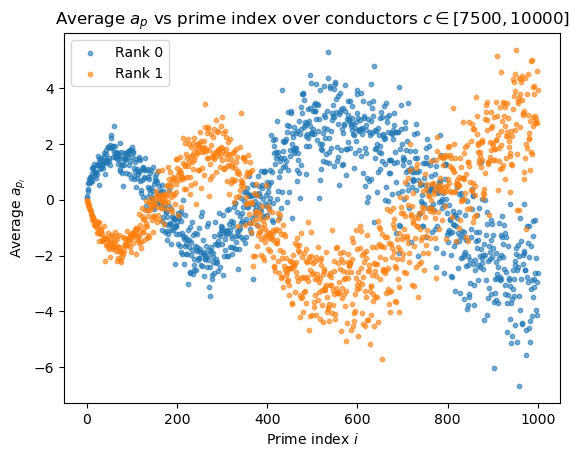

In [5]:
plt.scatter(range(N), rk0_aps, label="Rank 0", alpha=0.6, s=10)
plt.scatter(range(N), rk1_aps, label="Rank 1", alpha=0.6, s=10)
plt.legend()
plt.xlabel(r"Prime index $i$")
plt.ylabel(r"Average $a_{p_i}$")
plt.title(r"Average $a_p$ vs prime index over conductors $c \in [7500, 10000]$")
plt.savefig(f"ap_averages_7500_10000.png", dpi=150)
plt.show()

In [63]:
# Import rational elliptic curves from Candelas' paper

rational_form_labels = [
    "108570.cs1",
    "8190.j1",
    "99484.d1",
    "294630.bg2",
    "244530.bh2",
    "15180.m2",
    "56826.h2",
    "136290.cl2",
    "30940.b2",
    "198.d1",
    "18270.h2",
    "215710.l2",
    "170940.t2",
    "6006.n2",
    "1260.j1",
    "460922.d2",
    "60060.bc1",
    "39270.cn2",
    "30690.bc2",
    "2310.l3",
    "1260.d2",
    "910.a2",
    "106590.bz2",
    "422730.bw2",
    "244530.c1",
    "210.d3",
    "220.a2",
    "2394.k2",
    "414414.ck1",
    "30.a3",
    "53130.cf2",
    "81774.r2",
    "2310.u3",
    "358666.b2",
    "2170.k2",
    "15708.g2",
    "23310.w2",
    "5742.t2",
    "376740.v2",
    "2310.t2",
    "140910.be2",
    "1170.h2",
    "214830.bt2",
    "6270.k2",
    "84.b2",
    "87890.g2",
    "13860.t2",
    "117810.x2",
    "197340.n2",
    "90.a2",
    "10010.n2",
    "115710.cr2",
    "488070.c2",
    "462.f2",
    "10710.bc2",
    "20.a2",
    "180180.q2",
    "6006.p2",
    "256410.bs2",
    "43010.a2",
    "7770.ba4",
    "159390.s3",
    "630.j2",
    "12870.cc3",
    "125580.s3",
    "6930.ba3",
    "66.a2",
    "770.g3",
    "381810.bn3",
    "3570.j3",
    "432630.dv3",
    "497420.g3",
    "237510.v3",
    "2310.i2",
    "94710.br3",
    "352590.cz4",
    "363660.n4",
    "383460.w4",
    "6510.j4",
    "770.f4",
    "432630.c4",
    "308154.bw4",
    "27846.bf4",
    "284130.de4",
    "180180.bx4",
    "390.g4",
    "396270.bu4",
    "50622.j4",
    "487410.bw4",
    "48070.f4",
    "420.c4",
    "11220.k4",
    "144970.p4",
    "630.c4",
    "159390.eo4",
    "28490.b4",
    "124542.bc4",
    "421260.ba4",
    "217140.p4",
    "14.a6",
    "455070.cy4",
    "453390.cs4",
    "16830.bl4",
    "180180.cb4",
    "11970.bo4",
    "22610.m4",
    "14190.n4",
    "71610.o4",
    "1218.h4",
    "94710.cv4",
    "81510.bi4",
    "660.c4",
    "90090.dn4",
    "1638.e4",
    "4004.a4",
    "14070.e4",
    "415380.m4",
    "90.b4",
    "261030.v4",
    "418110.bh4",
    "122430.ba4",
    "11130.n4",
    "158730.bz4",
    "2660.c4",
    "4026.i4",
    "13860.k4",
    "117810.w4",
    "990.e4",
    "25830.bi4",
    "2730.m6",
    "244970.c4",
    "39270.bf4",
    "310.a4",
    "47124.k4",
    "4620.j4",
    "1170.c4",
    "118910.a4",
    "1974.j4",
    "186846.f4",
    "39780.h4",
    "218196.g4",
    "264740.a4",
    "180642.o4",
    "2130.g4",
    "23940.j4",
    "8690.f4",
    "53130.ch4",
    "61110.c4",
    "18746.c4",
    "23310.bl4",
    "33390.ca4",
    "77154.k4",
    "200970.p4",
    "16830.bi4",
    "322490.i4",
    "142230.t4",
    "30030.bt4",
    "345730.n3",
    "3570.w4",
    "306306.cv3",
    "231570.a3",
    "93610.a3",
    "81774.bv3",
    "150612.j1",
    "3870.l3",
    "2310.l3",
    "6402.r3",
    "179676.g3",
    "9790.b3",
    "431340.bd1",
    "73260.n1",
    "70380.t3",
    "66990.bq3",
    "910.g5",
    "2310.h2",
    "284130.du1",
    "171930.r3",
    "2394.d3",
    "30316.b3",
    "21420.v1",
    "210.d3",
    "99246.m3",
    "72930.bw3",
    "33110.b1",
    "56826.h1",
    "43890.ct4",
    "44460.c1",
    "53130.ci3",
    "3108.g3",
    "41730.k3",
    "198.d3",
    "208810.b3",
    "20460.m1",
    "18270.h1",
    "4060.b3",
    "17430.bp3",
    "14630.o2",
    "189210.cm1",
    "422730.dc2",
    "23562.bc1",
    "30.a3",
    "123354.bu2",
    "2070.a1",
    "159324.h2",
    "7084.c1",
    "2010.j2",
    "483210.ci1",
    "302610.ch1",
    "69762.bg2",
    "186438.j2",
    "1260.j2",
    "384090.z1",
    "170170.c2",
    "21210.bd2",
    "2090.c1",
    "60606.z1",
    "162470.b2",
    "1140.d1",
    "4290.bb2",
    "30690.r2",
    "60060.bc2",
    "91770.x2",
    "411180.n2",
    "332990.l1",
    "125034.i2",
    "296010.dq1",
    "34.a2",
    "30690.bc1",
    "21252.i1",
    "159390.dr2",
    "413490.bg2",
    "139230.cv2",
    "210.b2",
    "60606.k2",
    "175890.bx2",
    "31020.k2",
    "193578.i2",
    "164780.a2",
    "5754.i2",
    "1260.d1",
    "21630.bb2",
    "173740.b2",
    "1914.n1",
    "1290.h2",
    "126882.bk1",
    "71610.bs2",
    "910.a1",
    "19140.f2",
    "2070.p2",
    "123354.m1",
    "118830.f2",
    "65436.j1",
    "2310.u3",
    "456940.b1",
    "247170.dj1",
    "23562.h2",
    "157430.n2",
    "422730.bw1",
    "127974.y2",
    "156.b2",
    "71910.x1",
    "441210.cn2",
    "244530.c2",
    "43890.bj1",
    "15290.f2",
    "103290.s2",
    "1610.b1",
    "18270.bz2",
    "37740.f1",
    "149226.bs2",
    "415074.p2",
    "4270.c2",
    "45780.t2",
    "61230.z2",
    "198.b1",
    "358530.i2",
    "220780.b2",
    "471546.h2",
    "24780.p1",
    "44462.g1",
    "210.d4",
    "332010.ec1",
    "124830.bd2",
    "4830.bf1",
    "117810.cz2"
]

In [2]:
len(rational_form_labels)

285

In [2]:
# Extract Candelas' curves from LMFDB directly
curves = [EllipticCurve(label) for label in rational_form_labels]

In [3]:
save(curves, "Candelas_rational_curves")

In [6]:
curves = load("Candelas_rational_curves")

In [7]:
# Sort them by rank
ranks = []

for E in curves:
    if E.rank() not in ranks:
        ranks.append(E.rank())

In [36]:
ranks

[0, 1, 2]

In [8]:
rk0_curves = []
rk1_curves = []
rk2_curves = []

for E in curves:
    if E.rank() == 0:
        rk0_curves.append(E)
    elif E.rank() == 1:
        rk1_curves.append(E)
    else:
        rk2_curves.append(E)

In [38]:
print(f"Number of curves of rank 0, 1, 2: {len(rk0_curves)}, {len(rk1_curves)}, {len(rk2_curves)}")

Number of curves of rank 0, 1, 2: 144, 134, 7


In [9]:
def get_isogeny_class_representatives(cs):
    """Extract one representative from each isogeny class"""
    seen_classes = []
    representatives = []
    
    for i, E in enumerate(cs):
        iso_class = E.isogeny_class()
        if iso_class not in seen_classes:
            representatives.append(E)
            seen_classes.append(iso_class)
    
    return representatives

In [10]:
from sage.databases.cremona import CremonaDatabase # Database of elliptic curves over the rationals

# Apply to all three groups
print("Obtaining the isogeny class representatives for rank zero curves...")
rk0_isogeny_reps = get_isogeny_class_representatives(rk0_curves)
print("Done.")
print("Obtaining the isogeny class representatives for rank one curves...")
rk1_isogeny_reps = get_isogeny_class_representatives(rk1_curves)
print("Done.")
print("Obtaining the isogeny class representatives for rank two curves...")
rk2_isogeny_reps = get_isogeny_class_representatives(rk2_curves)
print("Done.")

Obtaining the isogeny class representatives for rank zero curves...
Done.
Obtaining the isogeny class representatives for rank one curves...
Done.
Obtaining the isogeny class representatives for rank two curves...
Done.


In [11]:
import numpy as np
# Import the list of primes
P = Primes()

In [70]:
# Extract the average aps
N = 1000 # Number of primes I want to plot
rk0_eigenforms = [E.q_eigenform(P[N]) for E in rk0_isogeny_reps]
rk1_eigenforms = [E.q_eigenform(P[N]) for E in rk1_isogeny_reps]
rk2_eigenforms = [E.q_eigenform(P[N]) for E in rk2_isogeny_reps]

rk0_aps = np.array([np.mean([ef[P[i]] for ef in rk0_eigenforms]) for i in range(N)])
rk1_aps = np.array([np.mean([ef[P[i]] for ef in rk1_eigenforms]) for i in range(N)])
rk2_aps = np.array([np.mean([ef[P[i]] for ef in rk2_eigenforms]) for i in range(N)])

In [71]:
save(rk0_aps, "Candelas_rk0_aps")
save(rk1_aps, "Candelas_rk1_aps")
save(rk2_aps, "Candelas_rk2_aps")

In [6]:
rk0_aps = load("Candelas_rk0_aps")
rk1_aps = load("Candelas_rk1_aps")
rk2_aps = load("Candelas_rk2_aps")
N = 1000

In [55]:
import matplotlib.pyplot as plt

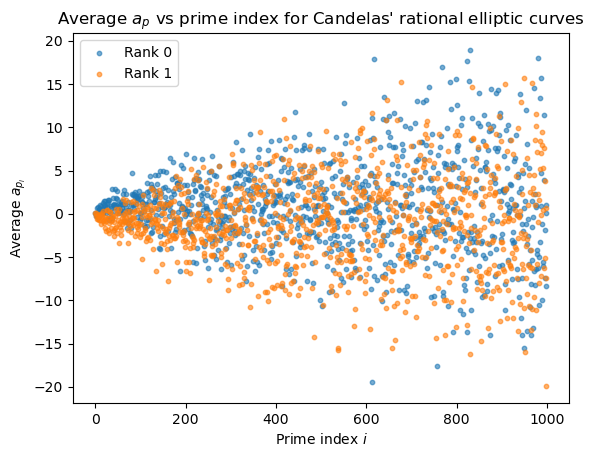

In [7]:
N = 1000
plt.scatter(range(N), rk0_aps[:N], label="Rank 0", alpha=0.6, s=10)
plt.scatter(range(N), rk1_aps[:N], label="Rank 1", alpha=0.6, s=10)
# plt.scatter(range(N), rk2_aps[:N], label="Rank 2", alpha=0.6, s=10)
plt.legend()
plt.xlabel(r"Prime index $i$")
plt.ylabel(r"Average $a_{p_i}$")
plt.title(r"Average $a_p$ vs prime index for Candelas' rational elliptic curves")
plt.savefig(f"Candelas_ap_averages_all_conductors.png", dpi=150)
plt.show()

In [53]:
db.isogeny_class("2254f")

[Elliptic Curve defined by y^2 + x*y + y = x^3 + x^2 - 687*x - 2059 over Rational Field,
 Elliptic Curve defined by y^2 + x*y + y = x^3 + x^2 - 8527*x - 306251 over Rational Field]

In [31]:
from sage.databases.cremona import CremonaDatabase

# Create database instance
db = CremonaDatabase()

# Specify the isogeny class
conductor = 2254
isogeny_class = 'f'
class_label = f"{conductor}{isogeny_class}"

# Get all curves in the isogeny class
try:
    # You can use either notation: "2254f" or "2254f1" 
    curves = db.isogeny_class(class_label)
    
    print(f"Isogeny class: {class_label}")
    print(f"Number of curves in class: {len(curves)}")
    print("-" * 60)
    
    for i, E in enumerate(curves, 1):
        label = f"{class_label}{i}"
        print(f"\nCurve {label}:")
        print(f"  Weierstrass equation: y^2 = {E.a_invariants()}")
        print(f"  Conductor: {E.conductor()}")
        print(f"  Discriminant: {E.discriminant()}")
        print(f"  j-invariant: {E.j_invariant()}")
        print(f"  Rank: {E.rank()}")
        print(f"  Torsion: {E.torsion_order()}")
        
    # Alternatively, access individual curves by their full label
    print("\n" + "="*60)
    print("Accessing curves individually:")
    for i in range(1, len(curves) + 1):
        label = f"{class_label}{i}"
        E = db.elliptic_curve(label)
        print(f"{label}: {E.ainvs()}")
        
except RuntimeError as e:
    print(f"Error: Isogeny class {class_label} not found in database")
    print(f"The conductor {conductor} may not have an isogeny class '{isogeny_class}'")

Isogeny class: 2254f
Number of curves in class: 2
------------------------------------------------------------

Curve 2254f1:
  Weierstrass equation: y^2 = (1, 1, 1, -687, -2059)
  Conductor: 2254
  Discriminant: 19396084736
  j-invariant: 304821217/164864
  Rank: 0
  Torsion: 2

Curve 2254f2:
  Weierstrass equation: y^2 = (1, 1, 1, -8527, -306251)
  Conductor: 2254
  Discriminant: 97586551328
  j-invariant: 582810602977/829472
  Rank: 0
  Torsion: 2

Accessing curves individually:
2254f1: (1, 1, 1, -687, -2059)
2254f2: (1, 1, 1, -8527, -306251)


In [48]:
EllipticCurve("2254f1").q_eigenform(100)[3]

2

In [8]:
R.<x> = PolynomialRing(QQ);  K.<a> = NumberField(R([-2, 0, 1]))
E = EllipticCurve([K([1,1]),K([-1,1]),K([1,0]),K([-883,-934]),K([-22223,-13420])])
# Elliptic curves over rational extensions do not have q_eigenforms, how do I extract the ap's? Via the L-functions, if I understand how to get
# the associated labels

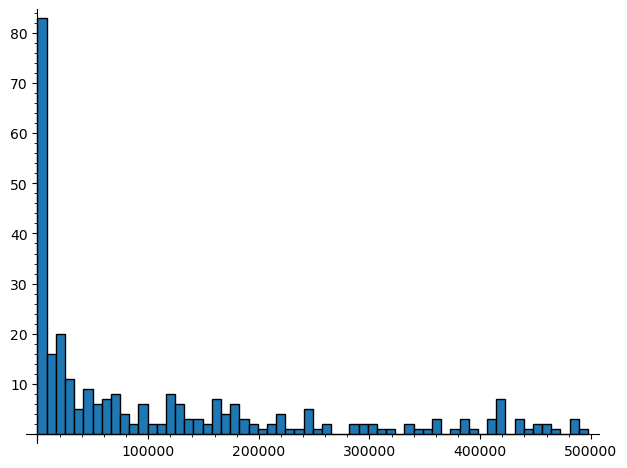

In [11]:
# Extract conductors
conductors = [E.conductor() for E in curves]

# Create histogram using Sage
from sage.plot.histogram import histogram
h = histogram(conductors, bins=60)
h.show()

In [101]:
min(conductors), max(conductors)
# This set is spread over all possible conductors!

(14, 497420)

In [12]:
import numpy as np

conductors = np.array(conductors)
len(np.nonzero((conductors > 7500)*(conductors < 10000))[0])

4

In [92]:
conductors[np.nonzero((conductors > 7500)*(conductors < 10000))[0]]

array([8190, 7770, 8690, 9790])

In [102]:
len(np.nonzero((conductors > 1)*(conductors < 100000))[0])

177

In [12]:
# Restrict plot to conductors < 100 000
rk0_isogeny_reps_restricted = [rk0_isogeny_reps[i] for i in np.nonzero(np.array([E.conductor() for E in rk0_isogeny_reps]) < 100000)[0]]
rk1_isogeny_reps_restricted = [rk1_isogeny_reps[i] for i in np.nonzero(np.array([E.conductor() for E in rk1_isogeny_reps]) < 100000)[0]]
rk2_isogeny_reps_restricted = [rk2_isogeny_reps[i] for i in np.nonzero(np.array([E.conductor() for E in rk2_isogeny_reps]) < 100000)[0]]

In [13]:
# Extract the average aps
N = 1000 # Number of primes I want to plot
rk0_eigenforms_restricted = [E.q_eigenform(P[N]) for E in rk0_isogeny_reps_restricted]
rk1_eigenforms_restricted = [E.q_eigenform(P[N]) for E in rk1_isogeny_reps_restricted]
rk2_eigenforms_restricted = [E.q_eigenform(P[N]) for E in rk2_isogeny_reps_restricted]

rk0_restricted_aps = np.array([np.mean([ef[P[i]] for ef in rk0_eigenforms_restricted]) for i in range(N)])
rk1_restricted_aps = np.array([np.mean([ef[P[i]] for ef in rk1_eigenforms_restricted]) for i in range(N)])
rk2_restricted_aps = np.array([np.mean([ef[P[i]] for ef in rk2_eigenforms_restricted]) for i in range(N)])

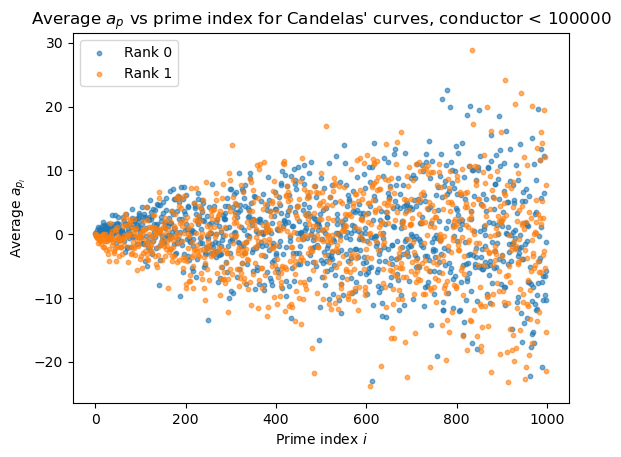

In [14]:
import matplotlib.pyplot as plt

N = 1000
plt.scatter(range(N), rk0_restricted_aps[:N], label="Rank 0", alpha=0.6, s=10)
plt.scatter(range(N), rk1_restricted_aps[:N], label="Rank 1", alpha=0.6, s=10)
# plt.scatter(range(N), rk2_aps[:N], label="Rank 2", alpha=0.6, s=10)
plt.legend()
plt.xlabel(r"Prime index $i$")
plt.ylabel(r"Average $a_{p_i}$")
plt.title(r"Average $a_p$ vs prime index for Candelas' curves, conductor < 100000")
plt.savefig(f"Candelas_ap_averages_0_100000.png", dpi=150)
plt.show()

Using 28 CPU cores
Extracting curves in conductor range [1, 100000]...


Loading curves: 657396it [23:09, 473.15it/s] 


Found 267565 rank 0 curves and 332314 rank 1 curves.
Extracting isogeny class representatives...


Rank 1 isogeny classes: 100%|███████████████████████████████████████████████| 332314/332314 [00:01<00:00, 290117.73it/s]


Found 168760 rank 0 isogeny classes
Found 222439 rank 1 isogeny classes
Computing first 1000 primes using prime_range...
Prime range: 2 to 7919
Computing rank 0 ap values in parallel...


Rank 0 curves: 100%|███████████████████████████████████████████████████████████| 168760/168760 [15:41<00:00, 179.17it/s]


Successfully computed ap for 168760/168760 rank 0 curves
Computing rank 1 ap values in parallel...


Rank 1 curves: 100%|███████████████████████████████████████████████████████████| 222439/222439 [21:19<00:00, 173.84it/s]


Successfully computed ap for 222439/222439 rank 1 curves
Converting to numpy arrays...
Computing averages...
Saving aps...
Done.
Plotting...


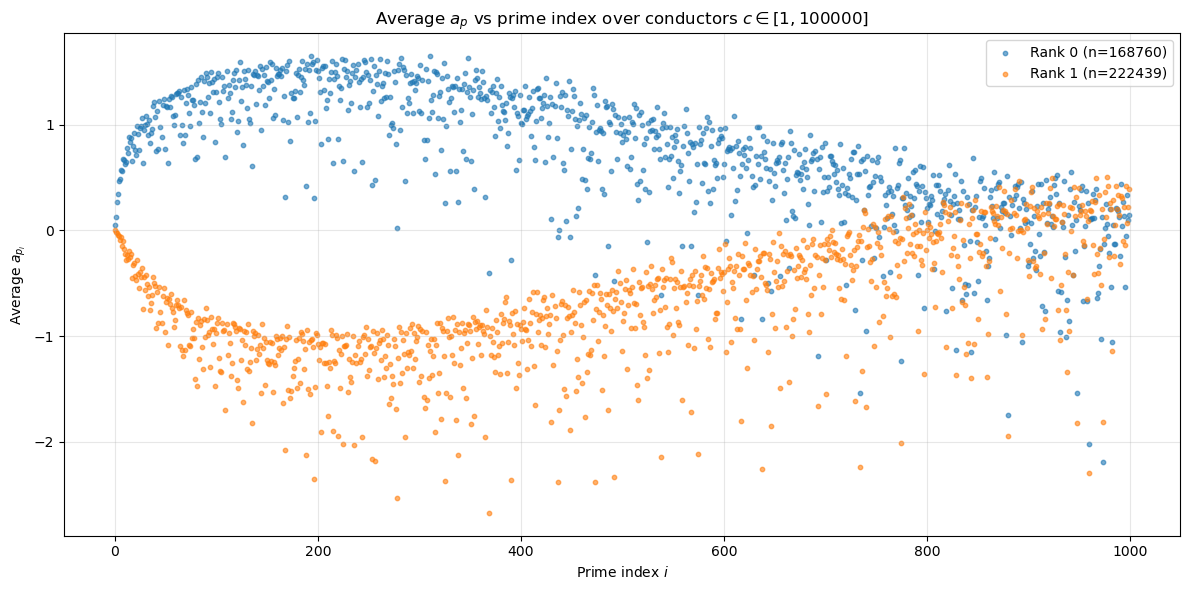


=== Summary ===
Rank 0: 168760/168760 curves (100.0%)
Rank 1: 222439/222439 curves (100.0%)
Total skipped: 0


In [2]:
# Parallelized

from sage.databases.cremona import CremonaDatabase
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed
import gc
import multiprocessing

# Get number of available cores
n_cores = multiprocessing.cpu_count()
print(f"Using {n_cores} CPU cores")

# Database of elliptic curves over the rationals
db = CremonaDatabase()

# Define conductor range
cmax = 100000
cmin = 1

# Extract elliptic curves with conductor in (cmin, cmax) and rank 0 or 1
print(f"Extracting curves in conductor range [{cmin}, {cmax}]...")
rank_zero_curves = []
rank_one_curves = []

for E in tqdm(db.iter(range(cmin, cmax)), desc="Loading curves"):
    if E.rank() == 0:
        rank_zero_curves.append(E)
    elif E.rank() == 1:
        rank_one_curves.append(E)

print(f"Found {len(rank_zero_curves)} rank 0 curves and {len(rank_one_curves)} rank 1 curves.")

# Extract representatives for different isogeny classes using LABELS
print("Extracting isogeny class representatives...")

def get_isogeny_label(E):
    """Extract isogeny class from Cremona label (e.g., '11a1' -> '11a')"""
    label = E.cremona_label()
    # Remove the final digit(s) to get isogeny class
    i = len(label) - 1
    while i >= 0 and label[i].isdigit():
        i -= 1
    return label[:i+1]

rk0_isogeny_reps = []
rk0_seen_labels = set()

for E in tqdm(rank_zero_curves, desc="Rank 0 isogeny classes"):
    iso_label = get_isogeny_label(E)
    if iso_label not in rk0_seen_labels:
        rk0_isogeny_reps.append(E)
        rk0_seen_labels.add(iso_label)

rk1_isogeny_reps = []
rk1_seen_labels = set()

for E in tqdm(rank_one_curves, desc="Rank 1 isogeny classes"):
    iso_label = get_isogeny_label(E)
    if iso_label not in rk1_seen_labels:
        rk1_isogeny_reps.append(E)
        rk1_seen_labels.add(iso_label)

print(f"Found {len(rk0_isogeny_reps)} rank 0 isogeny classes")
print(f"Found {len(rk1_isogeny_reps)} rank 1 isogeny classes")

# Use prime_range instead of Primes() to avoid PARI issues
N = 1000  # Number of primes to plot
print(f"Computing first {N} primes using prime_range...")
primes_list = list(primes_first_n(N))
print(f"Prime range: {primes_list[0]} to {primes_list[-1]}")

# Function to compute ap values for a single curve
def compute_ap_list_for_curve(E, primes):
    """Compute all ap values for a curve, return (label, ap_list) or (label, None) if failed"""
    try:
        label = E.cremona_label()
        ap_list = []
        for p in primes:
            ap = E.ap(p)
            ap_list.append(ap)
        return (label, ap_list)
    except:
        return (E.cremona_label(), None)

# Process curves in parallel
print("Computing rank 0 ap values in parallel...")
rk0_results = Parallel(n_jobs=n_cores, backend='multiprocessing')(
    delayed(compute_ap_list_for_curve)(E, primes_list)
    for E in tqdm(rk0_isogeny_reps, desc="Rank 0 curves")
)

# Process results
rk0_ap_matrix = []
rk0_valid_labels = []
rk0_skipped = []

for label, ap_list in rk0_results:
    if ap_list is not None:
        rk0_ap_matrix.append(ap_list)
        rk0_valid_labels.append(label)
    else:
        rk0_skipped.append(label)
        print(f"  Skipped: {label}")

print(f"Successfully computed ap for {len(rk0_valid_labels)}/{len(rk0_isogeny_reps)} rank 0 curves")

# Force garbage collection
gc.collect()

print("Computing rank 1 ap values in parallel...")
rk1_results = Parallel(n_jobs=n_cores, backend='multiprocessing')(
    delayed(compute_ap_list_for_curve)(E, primes_list)
    for E in tqdm(rk1_isogeny_reps, desc="Rank 1 curves")
)

# Process results
rk1_ap_matrix = []
rk1_valid_labels = []
rk1_skipped = []

for label, ap_list in rk1_results:
    if ap_list is not None:
        rk1_ap_matrix.append(ap_list)
        rk1_valid_labels.append(label)
    else:
        rk1_skipped.append(label)
        print(f"  Skipped: {label}")

print(f"Successfully computed ap for {len(rk1_valid_labels)}/{len(rk1_isogeny_reps)} rank 1 curves")

# Force garbage collection
gc.collect()

if len(rk0_ap_matrix) == 0 or len(rk1_ap_matrix) == 0:
    print("ERROR: Not enough ap values computed. Cannot proceed.")
else:
    # Convert to numpy arrays
    print("Converting to numpy arrays...")
    rk0_ap_matrix = np.array(rk0_ap_matrix, dtype=np.float64)
    rk1_ap_matrix = np.array(rk1_ap_matrix, dtype=np.float64)
    
    # Compute averages across curves for each prime
    print("Computing averages...")
    rk0_aps = np.mean(rk0_ap_matrix, axis=0)
    rk1_aps = np.mean(rk1_ap_matrix, axis=0)

    print("Saving aps...")
    save(rk0_aps, f"({cmin}, {cmax})_rk0_aps")
    save(rk1_aps, f"({cmin}, {cmax})_rk1_aps")
    save(rk0_valid_labels, f"({cmin}, {cmax})_rk0_labels")
    save(rk1_valid_labels, f"({cmin}, {cmax})_rk1_labels")
    print("Done.")

    print("Plotting...")
    plt.figure(figsize=(12, 6))
    plt.scatter(range(N), rk0_aps, label=f"Rank 0 (n={len(rk0_valid_labels)})", alpha=0.6, s=10)
    plt.scatter(range(N), rk1_aps, label=f"Rank 1 (n={len(rk1_valid_labels)})", alpha=0.6, s=10)
    plt.legend()
    plt.xlabel(r"Prime index $i$")
    plt.ylabel(r"Average $a_{p_i}$")
    plt.title(fr"Average $a_p$ vs prime index over conductors $c \in [{cmin}, {cmax}]$")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"ap_averages_{cmin}_{cmax}.png", dpi=150)
    plt.show()

    print("\n=== Summary ===")
    rk0_pct = 100.0 * len(rk0_valid_labels) / len(rk0_isogeny_reps)
    rk1_pct = 100.0 * len(rk1_valid_labels) / len(rk1_isogeny_reps)
    print(f"Rank 0: {len(rk0_valid_labels)}/{len(rk0_isogeny_reps)} curves ({rk0_pct:.1f}%)")
    print(f"Rank 1: {len(rk1_valid_labels)}/{len(rk1_isogeny_reps)} curves ({rk1_pct:.1f}%)")
    print(f"Total skipped: {len(rk0_skipped) + len(rk1_skipped)}")
    
    if rk0_skipped or rk1_skipped:
        print(f"\nSkipped curves saved to files.")
        save(rk0_skipped, f"({cmin}, {cmax})_rk0_skipped")
        save(rk1_skipped, f"({cmin}, {cmax})_rk1_skipped")

In [19]:
# Define conductor range
cmax = 100000
cmin = 1

rk0_valid_labels = load(f"({cmin}, {cmax})_rk0_labels")
rk1_valid_labels = load(f"({cmin}, {cmax})_rk1_labels")

In [24]:
import random

#Random sample 8000 curves from curves w/ conductor < 100000
sample_size = 8000

rk0_labels_sample = random.sample(rk0_valid_labels, sample_size)
rk1_labels_sample = random.sample(rk1_valid_labels, sample_size)

In [31]:
from sage.databases.cremona import CremonaDatabase
import numpy as np
import matplotlib.pyplot as plt

# Plot the average aps over this sample
rk0_curves_sample = [EllipticCurve(label) for label in rk0_labels_sample]

ValueError: There is no elliptic curve with label 52200bh1 in the default database; try installing the optional package database_cremona_ellcurve which contains the complete Cremona database